In [ ]:
!pip install RDKit
!pip install dcor
!pip install padelpy

# **IMPORTS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
import sys
import sklearn
from sklearn import preprocessing
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
import dcor
import scipy
from scipy.stats import shapiro
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **READ IN DATA**

In [ ]:
DATA_RDKIT_PATH = '/content/all_properties_RDKit_No_Label.csv'
DATA_RDKIT = pd.read_csv(DATA_RDKIT_PATH)
DATA_PADEL_PATH = '/content/all_properties_PADeL_No_Label.csv'
DATA_PADEL = pd.read_csv(DATA_PADEL_PATH)
DATA_THERMO_PATH = '/content/Thermo_Data_No_Label.csv'
DATA_THERMO = pd.read_csv(DATA_THERMO_PATH)

In [ ]:
DATA_RDKIT.head(5)

,fr_urea,fr_unbrch_alkane,fr_thiophene,fr_thiocyan,fr_thiazole,fr_tetrazole,fr_term_acetylene,fr_sulfone,fr_sulfonamd,fr_sulfide,...,NumRadicalElectrons,NumValenceElectrons,ExactMolWt,HeavyAtomMolWt,MolWt,qed,MinEStateIndex,MinAbsEStateIndex,MaxEStateIndex,MaxAbsEStateIndex
0,0,0,0,0,0,0,0,0,0,0,...,0,26,60.057515,52.032,60.096,0.463784,0.319444,0.319444,7.875000,7.875000
1,0,0,0,0,0,0,0,0,0,0,...,0,26,66.028107,62.018,66.050,0.399155,-2.166667,0.833333,10.333333,10.333333
2,0,0,0,0,0,0,0,0,0,0,...,0,32,74.073165,64.043,74.123,0.512822,0.343750,0.343750,8.066250,8.066250
3,0,0,0,0,0,0,0,0,0,0,...,0,32,74.073165,64.043,74.123,0.486927,-0.115741,0.115741,8.361111,8.361111
4,0,0,0,0,0,0,0,0,0,0,...,0,32,74.073165,64.043,74.123,0.483480,0.305556,0.305556,8.143519,8.143519


In [ ]:
DATA_PADEL.head(5)

,Ds,Ks,Vs,As,Ts,E3s,E2s,E1s,P2s,P1s,...,nH,nHeavyAtom,nAtom,nAromBond,naAromAtom,apol,AMR,ALogp2,ALogP,nAcid
0,1.582430,0.482809,6.315715,2.559691,3.178534,0.456928,0.529887,0.595615,0.220086,0.655206,...,8,4,12,0,0,11.416344,16.0871,0.469773,-0.6854,0
1,1.964731,0.312094,4.038030,1.494963,2.235708,0.381385,0.642763,0.940583,0.271454,0.541396,...,4,4,8,0,0,7.301172,10.8232,0.892836,0.9449,0
2,1.668266,0.595390,9.580251,4.138829,4.400874,0.492699,0.558452,0.617115,0.173243,0.730260,...,10,5,15,0,0,14.509930,18.9987,0.947508,-0.9734,0
3,1.313928,0.477864,8.949589,3.917910,3.916781,0.373433,0.434126,0.506369,0.216826,0.651909,...,10,5,15,0,0,14.509930,20.6715,0.484555,-0.6961,0
4,1.354626,0.285786,8.673008,3.893548,3.592450,0.371929,0.452957,0.529740,0.362138,0.495053,...,10,5,15,0,0,14.509930,21.5446,0.015426,0.1242,0


In [ ]:
DATA_THERMO.head(5)

,API gravity,CHARGE,DCPLS Solid-liquid Cp diff. at triple pt [CAL/MOL-K],DGFORM Gibbs energy of formation (ideal gas) [CAL/MOL],DGSFRM Gibbs energy of formation (solid) [CAL/MOL],"DHAQFM Heat of formation (aqueous infinite dilution), standard = 1 mol/kg [CAL/MOL]",DHFORM [CAL/MOL],DHSFRM Heat of formation (ideal gas) [CAL/MOL],DHVLB Heat of vaporization at TB [CAL/MOL],DLWC,...,TC Critical temperature [C],TCPRS \tTC for standard Peng Robinson [C],TPT Triple point temperature [C],TREFHS [C],VB Liquid molar volume at TB [CC/MOL],VC Critical volume [CC/MOL],VCRKT VC for Rackett model [CC/MOL],VLSTD \tAPI standard liquid molar volume [CC/MOL],ZC Critical compressibility factor,ZWITTER Zwitterions identifier
0,43.7000,0.0,6.67149,-38191.5,0.0,0.0,-60810.2,0.0,9933.19,1.0,...,263.65,263.65,-126.20,25.0,82.1269,219.0,219.0,74.5760,0.254,0.0
1,25.4783,0.0,NaN,-104969.0,0.0,0.0,-118706.0,0.0,5227.72,1.0,...,113.29,113.29,-118.59,25.0,65.2500,179.0,179.0,73.4601,0.252,0.0
2,42.4000,0.0,8.95514,-35994.1,0.0,0.0,-65706.5,0.0,10269.50,1.0,...,289.95,289.95,-89.30,25.0,103.3560,273.0,273.0,91.3015,0.258,0.0
3,43.1000,0.0,10.67280,-39887.3,0.0,0.0,-69958.0,0.0,9732.80,1.0,...,262.75,262.75,-114.70,25.0,102.4520,270.0,270.0,91.6451,0.254,0.0
4,42.3000,0.0,6.60321,-39672.3,0.0,0.0,-79010.2,0.0,9518.39,1.0,...,270.55,270.55,-9.00,25.0,121.5060,324.0,324.0,108.4980,0.266,0.0


# **CHAPTER ONE - DATA PREPROCESSING**

## Variance calculation

In [ ]:
def calculate_Variance(df):
  variances = df.var()
  drop_Columns = variances[variances ==0].index
  new_df = df.drop(drop_Columns, axis =1)
  return new_df

In [ ]:
DATA_RDKIT = calculate_Variance(DATA_RDKIT)
DATA_RDKIT.head(5)

,fr_unbrch_alkane,fr_term_acetylene,fr_sulfide,fr_pyridine,fr_priamide,fr_piperdine,fr_phenol_noOrthoHbond,fr_phenol,fr_para_hydroxylation,fr_nitro_arom_nonortho,...,MaxPartialCharge,NumValenceElectrons,ExactMolWt,HeavyAtomMolWt,MolWt,qed,MinEStateIndex,MinAbsEStateIndex,MaxEStateIndex,MaxAbsEStateIndex
0,0,0,0,0,0,0,0,0,0,0,...,0.042789,26,60.057515,52.032,60.096,0.463784,0.319444,0.319444,7.875000,7.875000
1,0,0,0,0,0,0,0,0,0,0,...,0.235427,26,66.028107,62.018,66.050,0.399155,-2.166667,0.833333,10.333333,10.333333
2,0,0,0,0,0,0,0,0,0,0,...,0.043042,32,74.073165,64.043,74.123,0.512822,0.343750,0.343750,8.066250,8.066250
3,0,0,0,0,0,0,0,0,0,0,...,0.050904,32,74.073165,64.043,74.123,0.486927,-0.115741,0.115741,8.361111,8.361111
4,0,0,0,0,0,0,0,0,0,0,...,0.045349,32,74.073165,64.043,74.123,0.483480,0.305556,0.305556,8.143519,8.143519


In [ ]:
DATA_PADEL = calculate_Variance(DATA_PADEL)
DATA_PADEL.head(5)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Ds,Ks,Vs,As,Ts,E3s,E2s,E1s,P2s,P1s,...,nH,nHeavyAtom,nAtom,nAromBond,naAromAtom,apol,AMR,ALogp2,ALogP,nAcid
0,1.582430,0.482809,6.315715,2.559691,3.178534,0.456928,0.529887,0.595615,0.220086,0.655206,...,8,4,12,0,0,11.416344,16.0871,0.469773,-0.6854,0
1,1.964731,0.312094,4.038030,1.494963,2.235708,0.381385,0.642763,0.940583,0.271454,0.541396,...,4,4,8,0,0,7.301172,10.8232,0.892836,0.9449,0
2,1.668266,0.595390,9.580251,4.138829,4.400874,0.492699,0.558452,0.617115,0.173243,0.730260,...,10,5,15,0,0,14.509930,18.9987,0.947508,-0.9734,0
3,1.313928,0.477864,8.949589,3.917910,3.916781,0.373433,0.434126,0.506369,0.216826,0.651909,...,10,5,15,0,0,14.509930,20.6715,0.484555,-0.6961,0
4,1.354626,0.285786,8.673008,3.893548,3.592450,0.371929,0.452957,0.529740,0.362138,0.495053,...,10,5,15,0,0,14.509930,21.5446,0.015426,0.1242,0


In [ ]:
DATA_THERMO = calculate_Variance(DATA_THERMO)
DATA_THERMO.head(5)


,API gravity,DCPLS Solid-liquid Cp diff. at triple pt [CAL/MOL-K],DGFORM Gibbs energy of formation (ideal gas) [CAL/MOL],DGSFRM Gibbs energy of formation (solid) [CAL/MOL],"DHAQFM Heat of formation (aqueous infinite dilution), standard = 1 mol/kg [CAL/MOL]",DHFORM [CAL/MOL],DHSFRM Heat of formation (ideal gas) [CAL/MOL],DHVLB Heat of vaporization at TB [CAL/MOL],DVBLNC,FREEZEPT Freeze point temperature [C],...,SG Specific gravity,TB Normal boiling point [C],TC Critical temperature [C],TCPRS \tTC for standard Peng Robinson [C],TPT Triple point temperature [C],VB Liquid molar volume at TB [CC/MOL],VC Critical volume [CC/MOL],VCRKT VC for Rackett model [CC/MOL],VLSTD \tAPI standard liquid molar volume [CC/MOL],ZC Critical compressibility factor
0,43.7000,6.67149,-38191.5,0.0,0.0,-60810.2,0.0,9933.19,1.0,-126.2,...,0.807700,97.20,263.65,263.65,-126.20,82.1269,219.0,219.0,74.5760,0.254
1,25.4783,NaN,-104969.0,0.0,0.0,-118706.0,0.0,5227.72,1.0,-117.0,...,0.901399,-24.02,113.29,113.29,-118.59,65.2500,179.0,179.0,73.4601,0.252
2,42.4000,8.95514,-35994.1,0.0,0.0,-65706.5,0.0,10269.50,1.0,-89.3,...,0.813800,118.75,289.95,289.95,-89.30,103.3560,273.0,273.0,91.3015,0.258
3,43.1000,10.67280,-39887.3,0.0,0.0,-69958.0,0.0,9732.80,1.0,-114.7,...,0.810700,99.75,262.75,262.75,-114.70,102.4520,270.0,270.0,91.6451,0.254
4,42.3000,6.60321,-39672.3,0.0,0.0,-79010.2,0.0,9518.39,1.0,-9.0,...,0.814400,102.05,270.55,270.55,-9.00,121.5060,324.0,324.0,108.4980,0.266


# Distance correlation coefficient filtering (not Pearson)

In [ ]:
def calculate_Distance_Correlation(df, value):
  drop_Columns = []
  new_df = df.copy()  # Initialize new_df as a copy of df
  columns = df.columns
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if dcor.distance_correlation(df[columns[i]], df[columns[j]]) >= value:
        print(columns[j])
        drop_Columns.append(columns[j])
        new_df = df.drop(columns = set(drop_Columns))  # Update new_df
  return new_df

In [ ]:
DATA_RDKIT = DATA_RDKIT.astype(float)
DATA_RDKIT = calculate_Distance_Correlation(DATA_RDKIT,0.95)
DATA_RDKIT.head(5)

fr_phenol
fr_Ar_OH
fr_Ar_OH
fr_nitro
SMR_VSA2
fr_ketone
fr_Imine
NumAromaticCarbocycles
fr_ArN
fr_Ar_NH
fr_COO
NumAromaticHeterocycles
fr_Al_OH
NumAliphaticCarbocycles
NHOHCount
Chi1
Chi0
NumValenceElectrons
SlogP_VSA12
SMR_VSA7
Chi0n
Chi0
NumValenceElectrons
NumValenceElectrons
HeavyAtomMolWt
MolWt
MolWt
MaxAbsEStateIndex


,fr_unbrch_alkane,fr_term_acetylene,fr_sulfide,fr_pyridine,fr_priamide,fr_piperdine,fr_phenol_noOrthoHbond,fr_para_hydroxylation,fr_nitro_arom_nonortho,fr_nitro_arom,...,FpDensityMorgan1,MinAbsPartialCharge,MaxAbsPartialCharge,MinPartialCharge,MaxPartialCharge,ExactMolWt,qed,MinEStateIndex,MinAbsEStateIndex,MaxEStateIndex
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.75,0.042789,0.396387,-0.396387,0.042789,60.057515,0.463784,0.319444,0.319444,7.875000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.50,0.210860,0.235427,-0.210860,0.235427,66.028107,0.399155,-2.166667,0.833333,10.333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.60,0.043042,0.396377,-0.396377,0.043042,74.073165,0.512822,0.343750,0.343750,8.066250
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.80,0.050904,0.393430,-0.393430,0.050904,74.073165,0.486927,-0.115741,0.115741,8.361111
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.60,0.045349,0.396110,-0.396110,0.045349,74.073165,0.483480,0.305556,0.305556,8.143519


In [ ]:
DATA_PADEL = DATA_PADEL.astype(float)
DATA_PADEL = calculate_Distance_Correlation(DATA_PADEL,0.95)
DATA_PADEL.head()


WPOL
WTPT-1
SRW4
SRW2
TWC
MWC3
MWC2
VAdjMat
MPC3
MPC2
ETA_Eta_R_L
ETA_Beta_s
EE_Dt
SpAD_Dt
SpDiam_Dt
SpMax_Dt
SP-3
SP-2
SP-1
SP-0
nBonds
nHeavyAtom
WTPT-1
MPC3
MPC2
ETA_Eta_R_L
SP-3
SP-1
SP-0
nBonds
nHeavyAtom
SpAD_D
SpDiam_D
SpMax_D
nN
nO
ETA_Epsilon_3
SpMAD_Dt
SRW2
TWC
MWC2
VAdjMat
MPC3
MPC2
ETA_Eta_R_L
ETA_Beta_s
EE_Dt
SpAD_Dt
SpDiam_Dt
SpMax_Dt
SP-3
SP-1
SP-0
nBonds
nHeavyAtom
AATS1m
ZMIC0
ATS1m
SRW10
SRW8
SRW6
SRW4
TWC
MWC10
MWC9
MWC8
MWC7
MWC6
MWC5
MWC4
MWC3
MWC2
ASP-1
SRW8
SRW6
SRW4
TWC
MWC10
MWC9
MWC8
MWC7
MWC6
MWC5
MWC4
MWC3
MWC2
ASP-1
SRW7
SRW5
SRW6
SRW4
TWC
MWC10
MWC9
MWC8
MWC7
MWC6
MWC5
MWC4
MWC3
MWC2
ASP-1
SRW5
SRW4
SRW2
TWC
MWC10
MWC9
MWC8
MWC7
MWC6
MWC5
MWC4
MWC3
MWC2
ASP-1
SRW2
TWC
MWC10
MWC9
MWC8
MWC7
MWC6
MWC5
MWC4
MWC3
MWC2
VAdjMat
n3HeteroRing
n3Ring
VCH-3
SCH-3
TWC
MWC10
MWC9
MWC8
MWC7
MWC6
MWC5
MWC4
MWC3
MWC2
VAdjMat
piPC1
ETA_Eta_R_L
SP-1
nBonds
nHeavyAtom
MWC10
MWC9
MWC8
MWC7
MWC6
MWC5
MWC4
MWC3
MWC2
VAdjMat
MPC2
nBonds
nHeavyAtom
MWC9
MWC8
MWC7
MWC6
MWC5
MWC4
M

,Ds,Ks,Vs,As,Ts,E3s,E2s,E1s,P2s,P1s,...,ATS2m,ATS0m,nX,nS,nC,nH,AMR,ALogp2,ALogP,nAcid
0,1.582430,0.482809,6.315715,2.559691,3.178534,0.456928,0.529887,0.595615,0.220086,0.655206,...,494.833294,696.888876,0.0,0.0,3.0,8.0,16.0871,0.469773,-0.6854,0.0
1,1.964731,0.312094,4.038030,1.494963,2.235708,0.381385,0.642763,0.940583,0.271454,0.541396,...,907.096291,1014.471146,2.0,0.0,2.0,4.0,10.8232,0.892836,0.9449,0.0
2,1.668266,0.595390,9.580251,4.138829,4.400874,0.492699,0.558452,0.617115,0.173243,0.730260,...,688.541831,843.185125,0.0,0.0,4.0,10.0,18.9987,0.947508,-0.9734,0.0
3,1.313928,0.477864,8.949589,3.917910,3.916781,0.373433,0.434126,0.506369,0.216826,0.651909,...,853.487804,843.185125,0.0,0.0,4.0,10.0,20.6715,0.484555,-0.6961,0.0
4,1.354626,0.285786,8.673008,3.893548,3.592450,0.371929,0.452957,0.529740,0.362138,0.495053,...,809.607840,843.185125,0.0,0.0,4.0,10.0,21.5446,0.015426,0.1242,0.0


In [ ]:
DATA_THERMO = DATA_THERMO.astype(float)
DATA_THERMO = calculate_Distance_Correlation(DATA_THERMO,0.95)
DATA_THERMO.head(5)

,API gravity,DCPLS Solid-liquid Cp diff. at triple pt [CAL/MOL-K],DGFORM Gibbs energy of formation (ideal gas) [CAL/MOL],DGSFRM Gibbs energy of formation (solid) [CAL/MOL],"DHAQFM Heat of formation (aqueous infinite dilution), standard = 1 mol/kg [CAL/MOL]",DHFORM [CAL/MOL],DHSFRM Heat of formation (ideal gas) [CAL/MOL],DHVLB Heat of vaporization at TB [CAL/MOL],DVBLNC,FREEZEPT Freeze point temperature [C],...,SG Specific gravity,TB Normal boiling point [C],TC Critical temperature [C],TCPRS \tTC for standard Peng Robinson [C],TPT Triple point temperature [C],VB Liquid molar volume at TB [CC/MOL],VC Critical volume [CC/MOL],VCRKT VC for Rackett model [CC/MOL],VLSTD \tAPI standard liquid molar volume [CC/MOL],ZC Critical compressibility factor
0,43.7000,6.67149,-38191.5,0.0,0.0,-60810.2,0.0,9933.19,1.0,-126.2,...,0.807700,97.20,263.65,263.65,-126.20,82.1269,219.0,219.0,74.5760,0.254
1,25.4783,NaN,-104969.0,0.0,0.0,-118706.0,0.0,5227.72,1.0,-117.0,...,0.901399,-24.02,113.29,113.29,-118.59,65.2500,179.0,179.0,73.4601,0.252
2,42.4000,8.95514,-35994.1,0.0,0.0,-65706.5,0.0,10269.50,1.0,-89.3,...,0.813800,118.75,289.95,289.95,-89.30,103.3560,273.0,273.0,91.3015,0.258
3,43.1000,10.67280,-39887.3,0.0,0.0,-69958.0,0.0,9732.80,1.0,-114.7,...,0.810700,99.75,262.75,262.75,-114.70,102.4520,270.0,270.0,91.6451,0.254
4,42.3000,6.60321,-39672.3,0.0,0.0,-79010.2,0.0,9518.39,1.0,-9.0,...,0.814400,102.05,270.55,270.55,-9.00,121.5060,324.0,324.0,108.4980,0.266


#  Checking Normality, Infinites, NANS


In [ ]:
def test_normality(df):
    gaussian_count = 0
    not_gaussian_count = 0

    for column in df.columns:
        stat, p = shapiro(df[column])
        #print('Column: %s, Statistics=%.3f, p=%.3f' % (column, stat, p))
        alpha = 0.05
        if p > alpha:
            #print(f'Sample {column} looks Gaussian (fail to reject H0)')
            gaussian_count += 1
        else:
            #print(f'Sample {column} does not look Gaussian (reject H0)')
            not_gaussian_count += 1

    print(f'Total Gaussian: {gaussian_count}')
    print(f'Total not Gaussian: {not_gaussian_count}')

In [ ]:
DATA_RDKIT_NORMALITY = test_normality(DATA_RDKIT)
DATA_PADEL_NORMALITY = test_normality(DATA_PADEL)
DATA_THERMO_NORMALITY = test_normality(DATA_THERMO)

Total Gaussian: 8
Total not Gaussian: 140
Total Gaussian: 548
Total not Gaussian: 567
Total Gaussian: 32
Total not Gaussian: 0


The choice of normalization methods should be based upon the nature of the data, thus we must test the distribution and scale.

*   With numerical data of differing scales where we dont want large values to dominate I could use min max scaling.

*   In the case of data that is normally distributed, standardization would be the best option  if the algorithms used assume the data is normally distributed.

*   Robust scaling and min-max normalization might be an option depending on the quantity of outliars.

*   Improtantly neural networks do not assume normal distributions of data, therefore it would be logical to assume the preprocessing step should be applied to avoid biaz of high magnitude features, thus min max scaling may be better than the Z-score normaliziation used.

therefore we must check for outliers.
It would most logical for me to compare standardization with normazilation.



In [ ]:

def print_infinite_values(df):
    pos_inf_positions = np.where(df == np.inf)
    neg_inf_positions = np.where(df == -np.inf)

    pos_inf_positions_list = list(zip(pos_inf_positions[0], pos_inf_positions[1]))
    neg_inf_positions_list = list(zip(neg_inf_positions[0], neg_inf_positions[1]))

    if pos_inf_positions_list:
        for row_index, column_index in pos_inf_positions_list:
            print(f"Positive infinite value found at Row {row_index} in Column '{df.columns[column_index]}'")

    if neg_inf_positions_list:
        for row_index, column_index in neg_inf_positions_list:
            print(f"Negative infinite value found at Row {row_index} in Column '{df.columns[column_index]}'")

    if not pos_inf_positions_list and not neg_inf_positions_list:
        print("No infinite values found in the DataFrame.")

def replace_infinite_with_max_min(df):
    for col in df.columns:
        if np.isinf(df[col]).any():  # if column has any infinite value
            max_val = df[col].replace([np.inf, -np.inf], np.nan).max()  # find max finite value
            min_val = df[col].replace([np.inf, -np.inf], np.nan).min()  # find min finite value
            df[col] = df[col].replace(np.inf, max_val)  # replace +inf with max value
            df[col] = df[col].replace(-np.inf, min_val)  # replace -inf with min value
    return df



In [ ]:
print_infinite_values(DATA_PADEL)
print_infinite_values(DATA_RDKIT)
print_infinite_values(DATA_THERMO)

Positive infinite value found at Row 137 in Column 'ETA_Eta_R'
Positive infinite value found at Row 137 in Column 'ETA_EtaP'
Positive infinite value found at Row 137 in Column 'ETA_Eta'
Positive infinite value found at Row 137 in Column 'DELS2'
Positive infinite value found at Row 137 in Column 'MAXDP2'
Positive infinite value found at Row 137 in Column 'MAXDN2'
Positive infinite value found at Row 137 in Column 'DELS'
Positive infinite value found at Row 137 in Column 'MAXDP'
Positive infinite value found at Row 137 in Column 'MAXDN'
Positive infinite value found at Row 137 in Column 'LipoaffinityIndex'
Positive infinite value found at Row 137 in Column 'gmax'
Positive infinite value found at Row 137 in Column 'meanI'
Positive infinite value found at Row 137 in Column 'sumI'
Positive infinite value found at Row 137 in Column 'maxsOm'
Positive infinite value found at Row 137 in Column 'maxsCH3'
Positive infinite value found at Row 137 in Column 'SsOm'
Positive infinite value found at R

In [ ]:
DATA_PADEL = replace_infinite_with_max_min(DATA_PADEL)

In [ ]:
print_infinite_values(DATA_PADEL)
print_infinite_values(DATA_RDKIT)
print_infinite_values(DATA_THERMO)

No infinite values found in the DataFrame.
No infinite values found in the DataFrame.
No infinite values found in the DataFrame.


In [ ]:
def print_total_nan_and_locations(df):
    nan_positions = np.where(df.isna())
    nan_positions_list = list(zip(nan_positions[0], nan_positions[1]))

    total_nan_values = len(nan_positions_list)
    total_values = df.size
    print(f'Total NaN values in DataFrame: {total_nan_values} ({total_nan_values / total_values * 100:.2f}%)')

    nan_columns = df.columns[df.isna().any()].tolist()
    print(f'Total columns with NaN values: {len(nan_columns)}')

    nan_rows = df.isnull().sum(axis=1)
    total_nan_rows = nan_rows[nan_rows > 0].count()
    print(f'Total rows with NaN values: {total_nan_rows}')

    for index, value in nan_rows.iteritems():
        if value > 0:
            row_percentage = value / df.shape[1] * 100  # percentage of NaN values in the row
            print(f'Number of NaN values in Row "{index}": {value} ({row_percentage:.2f}%)')

    # for column in nan_columns:
    #     nan_count = df[column].isna().sum()
    #     column_percentage = nan_count / df.shape[0] * 100  # percentage of NaN values in the column
    #     print(f'Number of NaN values in Column "{column}": {nan_count} ({column_percentage:.2f}%)')

    #for row_index, column_index in nan_positions_list:
        #print(f'NaN value found at Row {row_index} in Column "{df.columns[column_index]}"')

def drop_rows_with_high_nan(df):
    nan_rows = df.isnull().sum(axis=1)
    total_columns = df.shape[1]
    high_nan_rows = nan_rows[nan_rows > total_columns * 0.30].index

    print(f'Total rows with more than 30% missing values: {len(high_nan_rows)}')

    # Drop rows with more than 30% missing values
    df_clean = df.drop(high_nan_rows)

    return df_clean

def apply_multivariate_imputation(df):
    imp = IterativeImputer(max_iter=10, random_state=0)
    df_imputed = imp.fit_transform(df)

    # The output of fit_transform is a numpy array, so we need to convert it back to a DataFrame
    df_imputed = pd.DataFrame(df_imputed, columns=df.columns, index=df.index)

    return df_imputed

In [ ]:
print_total_nan_and_locations(DATA_PADEL)

Total NaN values in DataFrame: 4133 (1.98%)
Total columns with NaN values: 497
Total rows with NaN values: 38
Number of NaN values in Row "1": 1 (0.09%)
Number of NaN values in Row "13": 12 (1.08%)
Number of NaN values in Row "15": 1 (0.09%)
Number of NaN values in Row "18": 1 (0.09%)
Number of NaN values in Row "19": 13 (1.17%)
Number of NaN values in Row "20": 49 (4.39%)
Number of NaN values in Row "38": 37 (3.32%)
Number of NaN values in Row "40": 12 (1.08%)
Number of NaN values in Row "45": 75 (6.73%)
Number of NaN values in Row "50": 36 (3.23%)
Number of NaN values in Row "58": 1 (0.09%)
Number of NaN values in Row "64": 389 (34.89%)
Number of NaN values in Row "76": 12 (1.08%)
Number of NaN values in Row "78": 50 (4.48%)
Number of NaN values in Row "81": 24 (2.15%)
Number of NaN values in Row "87": 1 (0.09%)
Number of NaN values in Row "89": 1 (0.09%)
Number of NaN values in Row "95": 1 (0.09%)
Number of NaN values in Row "96": 24 (2.15%)
Number of NaN values in Row "100": 36 (3.

<ipython-input-27-643c0fe6daa1>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in nan_rows.iteritems():


In [ ]:
print_total_nan_and_locations(DATA_RDKIT)

Total NaN values in DataFrame: 24 (0.09%)
Total columns with NaN values: 8
Total rows with NaN values: 3
Number of NaN values in Row "137": 8 (5.41%)
Number of NaN values in Row "159": 8 (5.41%)
Number of NaN values in Row "166": 8 (5.41%)


<ipython-input-27-643c0fe6daa1>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in nan_rows.iteritems():


In [ ]:
print_total_nan_and_locations(DATA_THERMO)
#THIS CASE HERE REQUIRES SOME NUANCED OVER LOOK! WILL END DS OPERATIONS HERE AND CONTINUE AT A LATER DATE

Total NaN values in DataFrame: 382 (6.42%)
Total columns with NaN values: 32
Total rows with NaN values: 65
Number of NaN values in Row "1": 1 (3.12%)
Number of NaN values in Row "6": 5 (15.62%)
Number of NaN values in Row "7": 3 (9.38%)
Number of NaN values in Row "8": 1 (3.12%)
Number of NaN values in Row "10": 8 (25.00%)
Number of NaN values in Row "11": 6 (18.75%)
Number of NaN values in Row "18": 2 (6.25%)
Number of NaN values in Row "19": 1 (3.12%)
Number of NaN values in Row "20": 1 (3.12%)
Number of NaN values in Row "22": 1 (3.12%)
Number of NaN values in Row "23": 5 (15.62%)
Number of NaN values in Row "26": 16 (50.00%)
Number of NaN values in Row "27": 2 (6.25%)
Number of NaN values in Row "30": 1 (3.12%)
Number of NaN values in Row "36": 1 (3.12%)
Number of NaN values in Row "39": 2 (6.25%)
Number of NaN values in Row "40": 1 (3.12%)
Number of NaN values in Row "42": 5 (15.62%)
Number of NaN values in Row "44": 2 (6.25%)
Number of NaN values in Row "45": 5 (15.62%)
Number o

<ipython-input-27-643c0fe6daa1>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in nan_rows.iteritems():


In [ ]:
DATA_PADEL_MIN_MAX = drop_rows_with_high_nan(DATA_PADEL_MIN_MAX)
DATA_PADEL_STAND = drop_rows_with_high_nan(DATA_PADEL_STAND)

Total rows with more than 30% missing values: 8
Total rows with more than 30% missing values: 8


In [ ]:
print_total_nan_and_locations(DATA_PADEL_MIN_MAX)

Total NaN values in DataFrame: 658 (0.33%)
Total columns with NaN values: 76
Total rows with NaN values: 30
Number of NaN values in Row "1": 1 (0.09%)
Number of NaN values in Row "13": 12 (1.08%)
Number of NaN values in Row "15": 1 (0.09%)
Number of NaN values in Row "18": 1 (0.09%)
Number of NaN values in Row "19": 13 (1.17%)
Number of NaN values in Row "20": 49 (4.39%)
Number of NaN values in Row "38": 37 (3.32%)
Number of NaN values in Row "40": 12 (1.08%)
Number of NaN values in Row "45": 75 (6.73%)
Number of NaN values in Row "50": 36 (3.23%)
Number of NaN values in Row "58": 1 (0.09%)
Number of NaN values in Row "76": 12 (1.08%)
Number of NaN values in Row "78": 50 (4.48%)
Number of NaN values in Row "81": 24 (2.15%)
Number of NaN values in Row "87": 1 (0.09%)
Number of NaN values in Row "89": 1 (0.09%)
Number of NaN values in Row "95": 1 (0.09%)
Number of NaN values in Row "96": 24 (2.15%)
Number of NaN values in Row "100": 36 (3.23%)
Number of NaN values in Row "103": 12 (1.08%

<ipython-input-27-643c0fe6daa1>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in nan_rows.iteritems():


In [ ]:
DATA_RDKIT_MIN_MAX= apply_multivariate_imputation(DATA_RDKIT_MIN_MAX)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
print_total_nan_and_locations(DATA_RDKIT_MIN_MAX)

Total NaN values in DataFrame: 0 (0.00%)
Total columns with NaN values: 0
Total rows with NaN values: 0


<ipython-input-27-643c0fe6daa1>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in nan_rows.iteritems():


# Normalization

In [ ]:
def min_max_normalize(df):
    scaler = MinMaxScaler()
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return scaled_df


def standardize(df):
    scaler = StandardScaler()
    standardized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return standardized_df

In [ ]:
DATA_PADEL_MIN_MAX = min_max_normalize(DATA_PADEL)
DATA_RDKIT_MIN_MAX = min_max_normalize(DATA_RDKIT)
DATA_THERMO_MIN_MAX = min_max_normalize(DATA_THERMO)

NameError: ignored

In [ ]:
DATA_PADEL_STAND = standardize(DATA_PADEL)
DATA_RDKIT_STAND = standardize(DATA_RDKIT)
DATA_THERMO_STAND = standardize(DATA_THERMO)

# Outlier detection

Applying the Isolation Forest algorithm and plotting the outliers in a high-dimensional dataset  is complex because visualizing data in higher dimensions (more than 3) is not easy. Thus we  reduce the dimensionality of your data to 2D or to visualize it. Here we will apply the Isolation Forest algorithm to the datasets and then use PCA to reduce the dimensionality to 2D for visualization and plot the anomalies detected in the original high-dimensional dataset:

We first calculate a centroid of
all the chemicals in the training data set based on their
physicochemical properties and theoretical molecular descriptors.
Then we calculate the distance from each chemical to the centroid.
Finally, we identify a distance in which 90% of the chemicals are
enclosed. This distance is defined as the application domain of our
model. Removing potential outliers in the data preprocessing can help
narrow down the application domain which can help increase the
robustness of the model and reduce the uncertainty of the prediction
results. When applying our model on a new chemical, one first
calculates the distance of the new chemical to the centroid and
determines whether it is in or outside of the application domain. This
gives an estimation for the confidence of the predicted results.

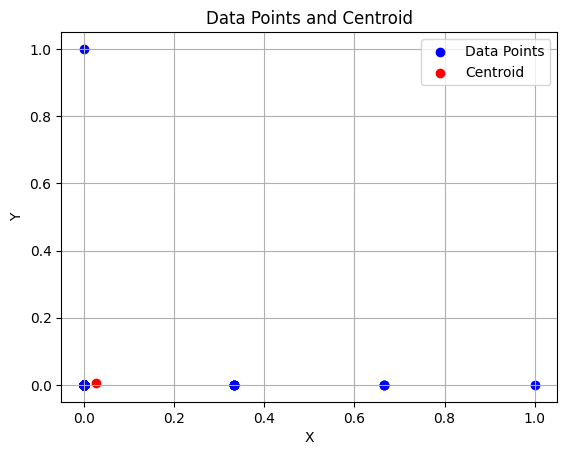

In [ ]:

def calculate_centroid(data):
    centroid = data.mean()
    return centroid

def plot_data_and_centroid(data, centroid):
    # Plot the data and centroid
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Data Points')
    plt.scatter(centroid[0], centroid[1], color='red', label='Centroid')
    plt.title('Data Points and Centroid')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()


# Calculate the centroid
centroid = calculate_centroid(DATA_RDKIT_MIN_MAX)

# Plot the data and centroid
plot_data_and_centroid(DATA_RDKIT_MIN_MAX, centroid)


In [ ]:
def apply_isolation_forest_and_plot(df):
    # Define the Isolation Forest model
    model = IsolationForest(contamination=0.1)

    # Fit the model
    model.fit(df)

    # Predict the anomalies in the data
    anomaly_pred = model.predict(df)

    # Find the location of anomalies in high-dimensional data
    anomalies_highD = df[anomaly_pred == -1]
    print("Anomalies in high-dimensional data:")
    print(anomalies_highD)

    # Reduce dimensionality to 2D using PCA
    pca = PCA(n_components=2)
    df_2D = pca.fit_transform(df)

    # Find the location of anomalies in 2D data
    anomalies_2D = df_2D[anomaly_pred == -1]

    # Plot the 2D data, anomalies are highlighted in red
    plt.figure(figsize=(10, 7))
    plt.scatter(df_2D[:, 0], df_2D[:, 1], color='blue', label = 'Normal')
    plt.scatter(anomalies_2D[:, 0], anomalies_2D[:, 1], color='red', label = 'Anomaly')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomalies in high-dimensional data:
     fr_unbrch_alkane  fr_term_acetylene  fr_sulfide  fr_pyridine  \
24                0.0                0.0         0.0          0.0   
32                0.0                0.0         0.0          0.0   
64                0.0                0.0         0.0          0.0   
65                0.0                0.0         0.0          0.0   
108               0.0                0.0         0.0          0.0   
121               0.0                0.0         0.0          0.0   
125               0.0                0.0         0.0          0.0   
126               0.0                0.0         0.0          0.0   
137               0.0                0.0         0.0          0.0   
141               0.0                0.0         0.0          0.0   
151               0.0                0.0         0.0          0.0   
157               0.0                0.0         0.0          0.0   
158               0.0                0.0         0.0          0.0  

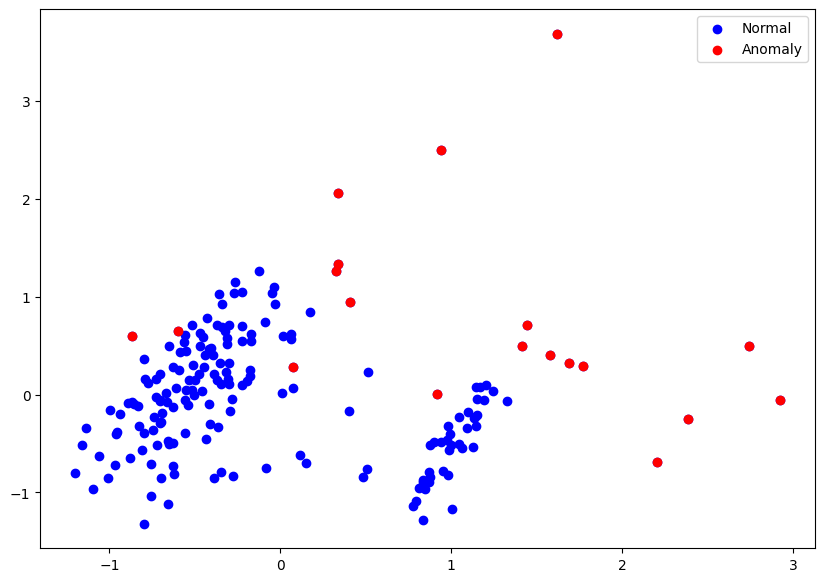

In [ ]:
DATA_RDKIT_MIN_MAX_OUTLIERS = apply_isolation_forest_and_plot(DATA_RDKIT_MIN_MAX)